In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

def max_div(a, b):
    return a / b if b != 0 else np.inf


def check_stop(arr):
    for i in range(len(arr)):
        if arr[i] > 0:
            return False
    return True


# n - колво ограничивающих неравенств. по совместительству - размер базиса
# m - колво переменных
def simplex(n, m, A, b, c):
    identity_matrix = np.eye(n)
    A = np.concatenate((A, identity_matrix), axis=1)
    Q = np.append(-np.array(c, dtype='float'), [0] * n)
    b = np.array(b, dtype='float')
    names = np.array([i for i in range(m)])
    step = 1

    basis = np.array([m + i for i in range(n)])

    min_q = 0
    mins = [0]

    while True:
        if (check_stop(Q) or step > 10):
            break

        # поиск макс столбца
        max_index = 0
        for i in range(n + m):
            if (Q[i] > Q[max_index]):
                max_index = i

        # поиск мин строки. с учетом только неотрицательных знаменателей
        min_index = -1
        for i in range(n):
            if ((A[i][max_index] > 0) and (min_index == -1 or (b[i] / A[i][max_index]) < (b[min_index] / A[min_index][max_index]))):
                min_index = i

        if max_index == -1:
            print("не ограничена снизу")
            return

        resh_elem = A[min_index][max_index]
        print_matr(A, b, Q, min_q, basis, max_index, min_index, names)

        copy_A = A.copy()
        copy_b = b.copy()
        copy_Q = Q.copy()

        # пересчитываем b
        for i in range(n):
            if i == min_index:
                copy_b[i] /= resh_elem
            else:
                copy_b[i] -= b[min_index] * A[i][max_index] / resh_elem

        # пересчитываем Q
        for i in range(n + m):
            copy_Q[i] -= A[min_index][i] * Q[max_index] / resh_elem

        # пересчитываем min_q
        min_q -= b[min_index] * Q[max_index] / resh_elem
        mins.append(min_q)

        # пересчитываем А
        # заполняем строку
        for i in range(n + m):
            copy_A[min_index][i] /= resh_elem

        # заполняем столбец нулями
        for i in range(n):
            if i == min_index:
                copy_A[i][max_index] = 1
            else:
                copy_A[i][max_index] = 0

        for i in range(n):
            for j in range(n + m):
                if i == min_index or j == max_index:
                    continue
                else:
                    copy_A[i][j] -= A[min_index][j] * A[i][max_index] / resh_elem

        # names - свободные переменные. все кроме базисных
        names[max_index] = basis[min_index]
        basis[min_index] = max_index

        A = copy_A
        b = copy_b
        Q = copy_Q

        # l = max_index = max stolbec
        # r = min_index = min stroka

        step += 1
    print_result(A, b, Q, min_q, names, basis)
    return mins



def print_matr(A, b, q, min_q, basis, l, r, names):
    simplex_table = np.concatenate(
        (np.concatenate((A, b.reshape(-1, 1)), axis=1),
         np.append(q, min_q).reshape(1, -1))
    )

    free_names = [f'x{i + 1}' for i in basis]
    x_names = [f'x{i + 1}' for i in names]

    column_names = sorted(free_names + x_names) + ['b']

    index_names = free_names + ['q']
    df = pd.DataFrame(simplex_table, columns=column_names, index=index_names)
    display(
        df.style.apply(lambda x: ['background-color: green'], subset=pd.IndexSlice[['q'], ['b']]) \
            .apply(lambda x: ['background-color: lightgreen'], subset=pd.IndexSlice[['q'], column_names[:-1]]) \
            .highlight_min(axis=1, color='yellow', subset=pd.IndexSlice[['q'], x_names]) \
            .apply(lambda x: ['background-color: lightblue' for i in x], subset=pd.IndexSlice[free_names, x_names]) \
            .apply(lambda x: ['color: red'], subset=pd.IndexSlice[free_names[r], column_names[l]]) \
            .set_properties(**{
            'font-size': '12pt'
        })
    )

def print_result(A, b, q, min_q, xs, basic):
    simplex_table = np.concatenate(
        (np.concatenate((A, b.reshape(-1, 1)), axis=1),
         np.append(q, min_q).reshape(1, -1))
    )

    free_names = [f'x{i + 1}' for i in basic]
    x_names = [f'x{i + 1}' for i in xs]

    column_names = sorted(free_names + x_names) + ['b']

    index_names = free_names + ['q']

    df = pd.DataFrame(simplex_table, columns=column_names, index=index_names)
    display(
        df.style.apply(lambda x: ['background-color: green'], subset=pd.IndexSlice[['q'], ['b']]) \
            .apply(lambda x: ['color: purple' for i in x], subset=pd.IndexSlice[free_names, ['b']]) \
            .set_properties(**{
            'font-size': '12pt'
        })
    )
    
def main_simplex(n, m, A, b, c):
    mins = simplex(n, m, A, b, c)
    iters = [i for i in range(len(mins))]
    plt.step(iters, mins)
    plt.xticks(iters)
    plt.show()

,x1,x2,x3,x4,x5,x6,x7,x8,b
x6,1,2,-1,2,4,1,0,0,1
x7,0,-1,2,1,3,0,1,0,3
x8,1,-3,2,2,0,0,0,1,4
q,-1,3,-2,-1,-4,0,0,0,0


,x1,x2,x3,x4,x5,x6,x7,x8,b
x2,0.5,1,-0.5,1,2,0.5,0,0,0.5
x7,0.5,0,1.5,2,5,0.5,1,0,3.5
x8,2.5,0,0.5,5,6,1.5,0,1,5.5
q,-2.5,0,-0.5,-4,-10,-1.5,0,0,-1.5


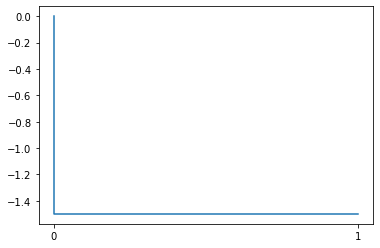

In [22]:
n, m = 3, 5
A = np.array([[1, 2, -1, 2, 4],
              [0, -1, 2, 1, 3],
              [1, -3, 2, 2, 0]
             ],
             dtype = 'float'
            )
b = [1, 3, 4]
c = [1, -3, 2, 1, 4]
main_simplex(n, m, A, b, c)

,x1,x2,x3,x4,x5,x6,x7,x8,b
x6,-1,3,0,2,1,1,0,0,1
x7,2,-1,1,2,3,0,1,0,2
x8,1,-1,2,1,0,0,0,1,4
q,1,3,-2,-1,-4,0,0,0,0


,x1,x2,x3,x4,x5,x6,x7,x8,b
x2,-0.333333,1,0,0.666667,0.333333,0.333333,0,0,0.333333
x7,1.66667,0,1,2.66667,3.33333,0.333333,1,0,2.33333
x8,0.666667,0,2,1.66667,0.333333,0.333333,0,1,4.33333
q,2,0,-2,-3,-5,-1,0,0,-1


,x1,x2,x3,x4,x5,x6,x7,x8,b
x2,0,1,0.2,1.2,1,0.4,0.2,0,0.8
x1,1,0,0.6,1.6,2,0.2,0.6,0,1.4
x8,0,0,1.6,0.6,-1,0.2,-0.4,1,3.4
q,0,0,-3.2,-6.2,-9,-1.4,-1.2,0,-3.8


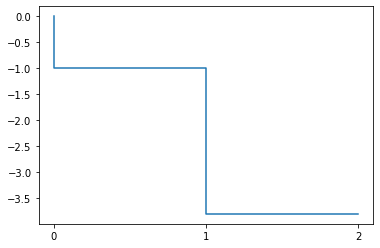

In [23]:
n, m = 3, 5
A = np.array([[-1, 3, 0, 2, 1],
              [2, -1, 1, 2, 3],
              [1, -1, 2, 1, 0]
             ],
             dtype = 'float'
            )
b = [1, 2, 4]
c = [-1, -3, 2, 1, 4]
main_simplex(n, m, A, b, c)

In [1]:
n, m = 3, 5
A = np.array([[-1, 3, 0, 2, 1],
              [2, -1, 1, 2, 3],
              [1, -1, 2, 1, 0]
             ],
             dtype = 'float'
            )
b = [1, 4, 5]
c = [-1, 0, -2, 5, 4]
main_simplex(n, m, A, b, c)

NameError: name 'np' is not defined

In [1]:
n, m = 3, 5
A = np.array([[2, 3, 1, 2, 1],
              [2, 1, -3, 2, 1],
              [2, 1, 2, 1, 0]
             ],
             dtype = 'float'
            )
b = [1, 3, 1]
c = [-1, 1, -2, 1, 5]
main_simplex(n, m, A, b, c)

NameError: name 'np' is not defined